In [69]:
import sys
sys.path.insert(0, "/Users/aimachine/PyImage/utils")
import numpy as np
from scipy import signal
from scipy.fftpack import fftfreq
import matplotlib.pyplot as plt
import os
from scipy.signal import blackman
from tifffile import imread
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from scipy.fftpack import fft
from matplotlib.colors import LogNorm
from Normalize import normalizeFloat, normalizeMinMax, Path, save_tiff_imagej_compatible

In [70]:
targetdir = '/Users/aimachine/Documents/JuliaData/Julia/Subset/NewImagesOz/'
sourceimage = '/Users/aimachine/Documents/JuliaData/Julia/Subset/NewImagesOz/10SegmentsCalculation.tif'

base = os.path.split(sourceimage)[-1]

Filename = os.path.splitext(base)


In [71]:
#Enter time unit in seconds
Time_unit = 5
#Cut Section of image before the alst pixel
CutSectionAfter = 1
#Remove the first zero line if there, else put 0
CutSectionX = 1
#Enter start y pixel unit for the section
StartSection = 0
#Enter end y pixel unit for section
EndSection = 800
#Range of Plot in Hertz
maxXrange = 0.1

1580   122


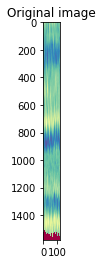

In [72]:
y = imread(sourceimage)
Xrange = y.shape[0]
Yrange = y.shape[1]
print(Xrange, " ", Yrange)
cutY = y[:,CutSectionAfter:Yrange]

y = cutY



width = int(EndSection - StartSection)
block = int(Xrange / width)
cutX = y[:,CutSectionX:Yrange]
plt.figure()
plt.imshow(y, plt.cm.Spectral)
plt.title('Original image')
y = cutX


Start = StartSection
End = EndSection

axes = 'XY'

Text(0.5,1,'Image Segment of interest')

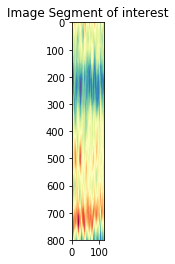

In [73]:

plt.figure()
 
fsmally = y[StartSection:EndSection, :]
 
    
plt.imshow(fsmally, plt.cm.Spectral)
plt.title('Image Segment of interest')

In [74]:
#FFT with filter
def doFilterFFT(image, filter):
   addedfft = 0 
   PointsSample = image.shape[1] 
   for i in range(image.shape[0]):
      if filter == True:   
       w = blackman(PointsSample)
      if filter == False:
       w = 1
      strip = image[i,:]
      fftresult = fft(w * strip)
      addedfft += np.abs(fftresult)  
   #addedfft/=image.shape[0]
   
   
   xf = fftfreq(PointsSample, Time_unit)
   
   
   return 2.0/PointsSample * addedfft[1:int(PointsSample//2)], xf[1:int(PointsSample//2)]

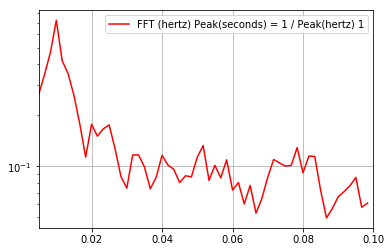

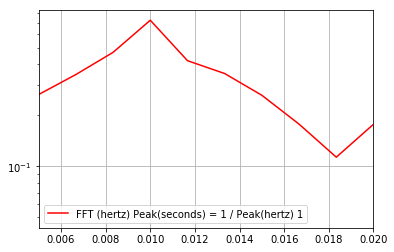

In [75]:

allfrequ = 0


 
fsmally = y[StartSection:EndSection, :]

   
onedimg, frequ = doFilterFFT(fsmally, False)
allfrequ=onedimg
plt.figure()
plt.semilogy(frequ, onedimg, '-r' )
plt.xlim(xmin = 0.005, xmax = 0.1 )
plt.grid()
plt.legend(['FFT (hertz) Peak(seconds) = 1 / Peak(hertz)' + ' ' + str(block)]) 
plt.savefig(targetdir + 'Filtered_' + Filename[0] + '.png')

plt.figure()
plt.semilogy(frequ, onedimg, '-r' )
plt.xlim(xmin = 0.005, xmax = 0.02 )

plt.grid()
plt.legend(['FFT (hertz) Peak(seconds) = 1 / Peak(hertz)' + ' ' + str(block)]) 
plt.savefig(targetdir + 'ZoomFiltered_' + Filename[0] + '.png')